# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px; padding:25px;">EARTHQUAKE VISUALIZATION<br>Terrifying 2023 February Earthquake of Turkey<br><br>(Heat Map with Time Folium, Data Manipulation)</p>

In this notebook I work with Folium and made some visualizations on maps. The start point of this project was creating impactful earthquakes' visualization which was held in Turkey on February this year. There were two huge earthquake destroyed 11 cities that magnitudes are bigger than 7.5 on Richter scale. Hope that this notebook helps you understand some of the Folium library usage.

---


**About Dataset**
The dataset scaped from the Disaster and Emergency Management Authority (AFAD) [website](https://deprem.afad.gov.tr/event-catalog). The range of dataset contains from 1990 to 2023 earthquakes around Turkiye. But we will focus on just two weeks that covers huge earthquakes. 

*Date* : Date and time values of earthquakes.

*Longitude* : Longitude value of earthquake's location.

*Latitude* : Latitude value of earthquake's location.

*Depth* : The depth of the earthquake in km.

*Rms* : RMS value of the earthquake.

*Type* : Magnitude calculation type. 

        MD; time dependent magnitude.
        
        ML; local magnitude.
        
        MS; surface wave magnitude.
        
        MW; momentum calculated magnitude.
        
*Magnitude* : the magnitude of the earthquake.

*Location* : location name of the earthquake.

*EventID* : unique id of earthquake.

In [ ]:
# !conda install -c conda-forge folium
# !pip install folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
# from matplotlib import style
# style.use('dark_background')
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

import folium
import branca
import branca.colormap as cm

from folium import plugins
from folium.plugins import HeatMap

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/1900-2023-turkey-earthquakes-afad/Turkey_Earthquakes_AFAD.csv


In [2]:
dataset = "/kaggle/input/1990-2023-turkey-earthquakes-afad/Turkey_Earthquakes_AFAD.csv"  # 1900-2023
df0 = pd.read_csv(dataset)
df = df0.copy()
df0

,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
0,2023-06-18T15:36:28,38.619,38.202,7.060,0.360,MW,4.600,Pütürge (Malatya),591273
1,2023-06-18T15:16:13,38.735,38.265,5.620,0.230,ML,1.900,Pütürge (Malatya),591272
2,2023-06-18T15:08:35,36.270,37.939,7.000,0.570,ML,2.400,Saimbeyli (Adana),591271
3,2023-06-18T14:17:33,27.666,37.905,7.000,0.410,ML,1.800,Germencik (Aydın),591270
4,2023-06-18T14:15:59,26.252,39.286,7.020,0.380,ML,2.600,"Ege Denizi, Midilli Adası (Lesvos) - [23.79 km...",591269
...,...,...,...,...,...,...,...,...,...
375963,1990-01-07T04:46:31,33.000,40.000,1.000,0.000,Md,3.000,Altındağ (Ankara),237970
375964,1990-01-06T14:08:16,33.000,39.000,12.000,1.000,Md,3.000,Kulu (Konya),237969
375965,1990-01-06T12:59:39,32.000,41.000,7.000,0.000,Md,3.000,Mengen (Bolu),237968
375966,1990-01-04T11:32:14,30.000,40.000,1.000,0.000,Md,3.000,Pazaryeri (Bilecik),237967


In [3]:
df.shape

(375968, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375968 entries, 0 to 375967
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       375968 non-null  object 
 1   Longitude  375968 non-null  float64
 2   Latitude   375968 non-null  float64
 3   Depth      375968 non-null  float64
 4   Rms        375968 non-null  float64
 5   Type       375968 non-null  object 
 6   Magnitude  375968 non-null  float64
 7   Location   375967 non-null  object 
 8   EventID    375968 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 25.8+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Time values are in GMT format so we need to arrange it to local time zone which is GMT+3
df['Date'] = df['Date'] + pd.Timedelta(hours=3)

In [7]:
df["Location"] = df.groupby(["Longitude", "Latitude"])["Location"].ffill().bfill()

In [8]:
df.isnull().sum()

Date         0
Longitude    0
Latitude     0
Depth        0
Rms          0
Type         0
Magnitude    0
Location     0
EventID      0
dtype: int64

In [9]:
df.columns

Index(['Date', 'Longitude', 'Latitude', 'Depth', 'Rms', 'Type', 'Magnitude',
       'Location', 'EventID'],
      dtype='object')

In [10]:
df[["Depth", "Rms", "Magnitude"]].describe()

,Depth,Rms,Magnitude
count,375968.000,375968.000,375968.000
mean,8.457,0.403,2.073
std,6.574,0.404,0.740
min,-0.024,0.000,0.000
25%,6.990,0.230,1.500
50%,7.000,0.370,2.000
75%,7.170,0.540,2.600
max,345.200,88.030,7.700


In [11]:
df.describe(include="O")

,Type,Location
count,375968,375968
unique,7,72664
top,ML,Akhisar (Manisa)
freq,256223,7973


In [12]:
df[df["Depth"] <= 0.05]

,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
488,2023-06-16 09:24:25,37.086,37.304,0.010,0.400,ML,1.400,Pazarcık (Kahramanmaraş),590782
895,2023-06-14 10:04:20,38.860,38.254,0.020,0.690,ML,1.500,Pütürge (Malatya),590374
928,2023-06-14 05:24:18,37.707,38.187,0.010,0.390,ML,1.400,Elbistan (Kahramanmaraş),590328
2186,2023-06-07 15:35:21,41.691,41.039,0.000,0.880,ML,1.100,Yusufeli (Artvin),589080
10009,2023-05-02 15:47:20,29.614,37.568,0.010,0.660,ML,2.200,Yeşilova (Burdur),580725
...,...,...,...,...,...,...,...,...,...
262981,2013-11-21 02:32:21,25.536,34.745,0.000,0.340,ML,2.400,Akdeniz,209450
290058,2011-10-24 11:05:12,43.646,38.961,0.000,0.800,ML,3.700,Muradiye (Van),230096
290694,2011-08-18 15:08:11,42.967,42.524,0.000,0.900,Md,3.400,"Ambrolauri, Racha-Lechkhumi-Kvemo Svaneti (Gür...",137846
343077,2007-03-29 01:58:52,27.447,37.070,0.000,24.760,Ml,0.000,Bodrum (Muğla),52606


In [13]:
# We drop earthquakes whose Depth value is less than 50 meter
ind = df[df["Depth"] <= 0.05].index
df.drop(ind, inplace=True)
df.reset_index(drop=True, inplace=True)

In [14]:
df.sample(10)

,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
100363,2020-11-05 11:57:37,26.951,37.899,7.000,0.190,ML,1.000,Ege Denizi - Kuşadası Körfezi - [18.65 km] Men...,486069
129896,2019-11-04 19:06:10,28.776,36.470,7.010,0.340,ML,1.700,Akdeniz - [25.74 km] Dalaman (Muğla),450926
117650,2020-02-23 16:10:41,27.868,39.414,7.030,0.330,ML,2.000,Altıeylül (Balıkesir),466608
33768,2023-02-28 22:09:51,37.005,37.453,7.150,0.220,ML,1.000,Dulkadiroğlu (Kahramanmaraş),556028
40899,2023-02-16 22:34:08,36.143,36.317,7.010,0.280,ML,2.200,Antakya (Hatay),548762
79414,2021-08-09 22:14:41,27.624,36.672,7.300,0.890,ML,1.400,Ege Denizi - [05.81 km] Datça (Muğla),509210
271678,2013-05-30 04:42:19,28.741,38.315,7.000,0.290,Ml,2.000,Sarıgöl (Manisa),196070
199128,2017-03-02 15:43:57,38.475,37.594,7.000,0.350,ML,1.500,Samsat (Adıyaman),363925
322221,2009-03-02 16:27:23,30.059,40.444,7.000,0.310,Md,2.700,Osmaneli (Bilecik),82371
127718,2019-12-17 09:08:36,28.205,35.861,6.650,0.960,ML,1.600,Akdeniz - [85.96 km] Marmaris (Muğla),454275


In [15]:
df2 = df[df["Date"] > "2023-01-01 00:00:00"]

In [16]:
df2["Date"].min(), df2["Date"].max()

(Timestamp('2023-01-01 00:12:31'), Timestamp('2023-06-18 18:36:28'))

In [17]:
df2 = df[df["Magnitude"] > 4.5]

In [18]:
df2.shape

(184, 9)

In [19]:
df2 = df2.sort_values(by="Magnitude", ascending=False)

In [20]:
# We specify the middle of the area that we work on it
lat = 37.5
long = 36.9

# lat = df['Longitude'].mean()
# long = df['Latitude'].mean()
# round(lat, 2), round(long, 2)

In [21]:
folium.Map(location=[lat, long], zoom_start=8)

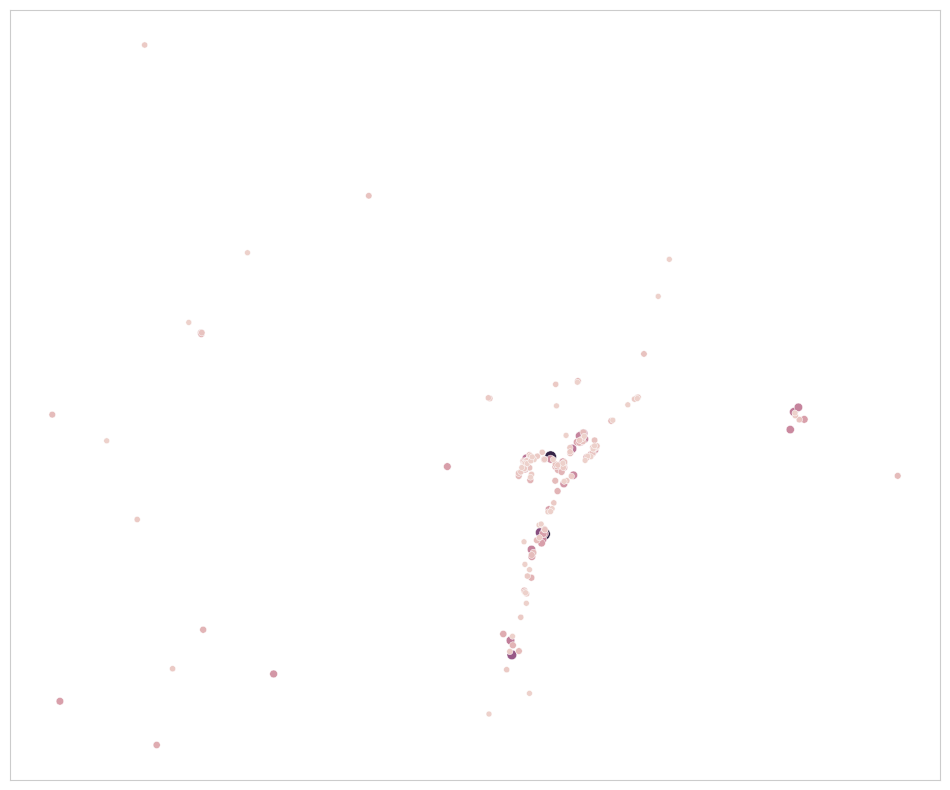

In [22]:
# Earthquakes held in between Arabian Plate and Anatolian Plate. We can see below that earthquakes line shown on the Eastern Anatolian Fault
plt.figure(figsize=(12, 10))

sns.scatterplot(x='Longitude', y='Latitude', data=df2.sort_values(by="Magnitude"), hue="Magnitude", size="Magnitude", legend=False);
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.show()

In [25]:
m = folium.Map(location=[lat, long], zoom_start=8)

colormap = cm.StepColormap(colors=["yellow", "blue", "purple", "red"], 
                           index=[4.5, 5, 6, 7, 8], 
                           vmin=4.5, vmax=8)

for loc, mag in zip(zip(df2['Latitude'], df2['Longitude']), df2["Magnitude"]):
    radius = (mag / 1.5) ** 2  # scaling the markers
    folium.CircleMarker(location=loc, radius=radius, fill=True,
                  color=colormap(mag)).add_to(m)    
    

# Top 15 locations in the DataFrame are added as markers to the map
for i in range(0, len(df2) // 12):
    folium.Marker([df2['Latitude'].iloc[i], df2['Longitude'].iloc[i]], icon=folium.Icon(icon='house-flood-water', prefix='fa'),  # you need to use free icons
                  tooltip=folium.Tooltip(f"{df2['Location'].iloc[i]} // M{df2['Magnitude'].iloc[i]} // {df2['Date'].dt.date.iloc[i]}")).add_to(m)

m

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:100%; text-align:center; border-radius:10px 10px; padding:25px;">Focusing on the targeted working area data</p>

We will limit our data to have clear visualization

In [28]:
df = df[df["Date"] > "2023-02-01 00:00:00"]

In [29]:
df = df[df["Date"] < "2023-02-15 00:00:00"]

In [30]:
df["Date"].min(), df["Date"].max()

(Timestamp('2023-02-01 00:18:48'), Timestamp('2023-02-14 23:58:44'))

In [31]:
df = df[(df["Latitude"] > 35.8) & (df["Latitude"] < 38.9)]

In [32]:
df = df[(df["Longitude"] > 34.2) & (df["Longitude"] < 38.6)]

In [33]:
df[df["Magnitude"] >= 3]

,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
42037,2023-02-14 23:51:15,36.470,37.976,7.000,0.430,ML,3.000,Göksun (Kahramanmaraş),547515
42063,2023-02-14 23:08:03,37.725,37.768,5.690,0.290,MW,3.800,Gölbaşı (Adıyaman),547494
42078,2023-02-14 22:32:39,37.706,37.782,8.020,0.190,ML,3.200,Gölbaşı (Adıyaman),547487
42086,2023-02-14 22:15:56,36.316,37.130,7.000,0.440,ML,3.200,Merkez (Osmaniye),547480
42122,2023-02-14 20:52:56,36.070,36.193,8.580,0.930,ML,3.400,Defne (Hatay),547441
...,...,...,...,...,...,...,...,...,...
47477,2023-02-06 04:28:16,36.920,37.304,6.200,0.210,MW,6.600,Nurdağı (Gaziantep),543431
47478,2023-02-06 04:26:49,36.992,37.235,6.980,0.420,ML,5.600,Nurdağı (Gaziantep),543429
47479,2023-02-06 04:23:16,36.806,37.224,7.000,0.760,ML,4.900,Nurdağı (Gaziantep),543432
47480,2023-02-06 04:17:32,37.043,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428


In [35]:
df[df["Magnitude"] >= 6.0]

,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
47234,2023-02-06 13:24:47,37.239,38.089,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593
47477,2023-02-06 04:28:16,36.920,37.304,6.200,0.210,MW,6.600,Nurdağı (Gaziantep),543431
47480,2023-02-06 04:17:32,37.043,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428


In [34]:
df = df[df["Magnitude"] >= 4.5]

In [36]:
df.shape

(135, 9)

In [37]:
# folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=8)

In [38]:
data = df[["Longitude", "Latitude", "Magnitude"]]  # , "Date", "Location"

In [39]:
# Earthquakes intensity map
m = folium.Map(location=[lat, long], zoom_start=8)

plugins.HeatMap(data, radius=14, gradient={0.5: 'cyan', 0.8: 'yellow', 0.97: 'red'}).add_to(m)

m

In [40]:
# Sort the dataframe by the 'Date' column
df = df.sort_values('Date')

# Reset the index
df = df.reset_index(drop=True)

In [41]:
df.shape

(135, 9)

In [42]:
data2 = [df[df['EventID'] == df['EventID'].unique()[i]][['Latitude','Longitude', "Magnitude", "Location"]].values.tolist()
         for i in range(len(df['EventID'].unique()))]

In [43]:
lat_long_mag = [[[pair[0], pair[1], pair[2]]] for sublist in data2 for pair in sublist]
# mag = pairs = [[[pair[2]]] for sublist in data2 for pair in sublist]
loc_name = [[[pair[3]]] for sublist in data2 for pair in sublist]

In [46]:
index = [np.datetime_as_string(dt, unit='s').replace('T', ' // ') for dt in sorted(np.array(df['Date']))]

In [47]:
print(data2[0][:3], "\n\n", lat_long_mag[:3], "\n\n", loc_name[:3])  #, "\n\n", mag[:3]

[[37.208, 36.403, 4.6, 'Düziçi (Osmaniye)']] 

 [[[37.208, 36.403, 4.6]], [[37.288, 37.043, 7.7]], [[37.224, 36.806, 4.9]]] 

 [[['Düziçi (Osmaniye)']], [['Pazarcık (Kahramanmaraş)']], [['Nurdağı (Gaziantep)']]]


In [48]:
len(data2), len(data2[0]), len(data2[0][0])

(135, 1, 4)

In [49]:
# Length of data, index and other parameters values must be same
len(lat_long_mag), len(index), len(loc_name)  #, len(mag)

(135, 135, 135)

In [50]:
# Checking if there are more than one data in sublists
multiple_pairs_indices = []

# Check which sublists have multiple pairs
for sublist_idx, sublist in enumerate(data2):
    if len(sublist) > 1:
        multiple_pairs_indices.append(sublist_idx)

# Print the indices of sublists with multiple pairs
print(len(multiple_pairs_indices), "Sublists with multiple pairs: ", multiple_pairs_indices)

0 Sublists with multiple pairs:  []


In [51]:
len(df['Date'].unique())

135

In [52]:
# df[df['Date'].duplicated()]

In [53]:
# type(df['Date'].unique())

numpy.ndarray

In [54]:
m = folium.Map(location=[lat, long], zoom_start=8)

hm = plugins.HeatMapWithTime(data=lat_long_mag, index=index, name=loc_name, radius=18,
                             use_local_extrema=True, min_speed=1, speed_step=1, position="bottomright")

hm.add_to(m)

m

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:120%; text-align:center; border-radius:10px 10px; padding:25px;">Manipulation</p>

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:100%; text-align:center; border-radius:10px 10px; padding:25px;">Generating Locations Around Original Location</p>

We have heatmap but it is not possible to show bigger earthquakes larger. So we will manipulate our data. To do this first we will add new data arround earthquakes according to their Magnitude value. Then we must set them in the same group to show at the same time on the map. There is one more challenge that showing long time for the huge earthquakes when playing. So we will duplicate our data and set every duplicated data group different from the previous group name.

In [55]:
df.columns

Index(['Date', 'Longitude', 'Latitude', 'Depth', 'Rms', 'Type', 'Magnitude',
       'Location', 'EventID'],
      dtype='object')

In [56]:
df.duplicated().sum()

0

In [57]:
df["EventID"].duplicated().sum()

0

In [58]:
df_m = df.copy()
df_new = pd.DataFrame()
disp1 = 0.02
disp2 = 0.01
disp3 = 0.014

for index, row in df_m.iterrows():
    magnitude = row['Magnitude']
    original_row = row.copy()

    if magnitude >= 7:
        new_row1, new_row2, new_row3, new_row4 = original_row.copy(), original_row.copy(), original_row.copy(), original_row.copy()
        new_row5, new_row6, new_row7, new_row8 = original_row.copy(), original_row.copy(), original_row.copy(), original_row.copy()
        
        for i in range(5):
            new_row1['Latitude'] = original_row['Latitude'] + (disp1 * i)            
            new_row2['Latitude'] = original_row['Latitude'] - (disp1 * i)            
            new_row3['Longitude'] = original_row['Longitude'] - (disp1 * i)            
            new_row4['Longitude'] = original_row['Longitude'] + (disp1 * i)
            
            new_row5['Latitude'] = original_row['Latitude'] + (disp3 * i)
            new_row5['Longitude'] = original_row['Longitude'] + (disp3 * i)
            new_row6['Latitude'] = original_row['Latitude'] + (disp3 * i)
            new_row6['Longitude'] = original_row['Longitude'] - (disp3 * i)
            new_row7['Latitude'] = original_row['Latitude'] - (disp3 * i)
            new_row7['Longitude'] = original_row['Longitude'] + (disp3 * i)
            new_row8['Latitude'] = original_row['Latitude'] - (disp3 * i)
            new_row8['Longitude'] = original_row['Longitude'] - (disp3 * i)

            df_new = df_new.append([new_row1, new_row2, new_row3, new_row4, new_row5, new_row6, new_row7, new_row8], ignore_index=True)
        
    if magnitude >= 6:
        new_row1, new_row2, new_row3, new_row4 = original_row.copy(), original_row.copy(), original_row.copy(), original_row.copy()
        new_row5, new_row6, new_row7, new_row8 = original_row.copy(), original_row.copy(), original_row.copy(), original_row.copy()
        
        for i in range(4):
            new_row1['Latitude'] = original_row['Latitude'] + (disp1 * i)
            new_row2['Latitude'] = original_row['Latitude'] - (disp1 * i)
            new_row3['Longitude'] = original_row['Longitude'] - (disp1 * i)
            new_row4['Longitude'] = original_row['Longitude'] + (disp1 * i)
            
            new_row5['Latitude'] = original_row['Latitude'] + (disp3 * i)
            new_row5['Longitude'] = original_row['Longitude'] + (disp3 * i)
            new_row6['Latitude'] = original_row['Latitude'] + (disp3 * i)
            new_row6['Longitude'] = original_row['Longitude'] - (disp3 * i)
            new_row7['Latitude'] = original_row['Latitude'] - (disp3 * i)
            new_row7['Longitude'] = original_row['Longitude'] + (disp3 * i)
            new_row8['Latitude'] = original_row['Latitude'] - (disp3 * i)
            new_row8['Longitude'] = original_row['Longitude'] - (disp3 * i)
            
            df_new = df_new.append([new_row1, new_row2, new_row3, new_row4, new_row5, new_row6, new_row7, new_row8], ignore_index=True)
   
    if magnitude >= 5:
        new_row1, new_row2, new_row3, new_row4 = original_row.copy(), original_row.copy(), original_row.copy(), original_row.copy()
        
        for i in range(3):
            new_row1['Latitude'] = original_row['Latitude'] + (disp2 * i)
            new_row2['Latitude'] = original_row['Latitude'] - (disp2 * i)
            new_row3['Longitude'] = original_row['Longitude'] - (disp2 * i)
            new_row4['Longitude'] = original_row['Longitude'] + (disp2 * i)
            
            df_new = df_new.append([new_row1, new_row2, new_row3, new_row4], ignore_index=True)

#     if magnitude >= 4.5:
#         new_row1, new_row2, new_row3, new_row4 = original_row.copy(), original_row.copy(), original_row.copy(), original_row.copy()
        
#         for i in range(2):
#             new_row1['Latitude'] = original_row['Latitude'] + (disp2 * i)            
#             new_row2['Latitude'] = original_row['Latitude'] - (disp2 * i)            
#             new_row3['Longitude'] = original_row['Longitude'] - (disp2 * i)            
#             new_row4['Longitude'] = original_row['Longitude'] + (disp2 * i)
            
#             df_new = df_new.append([new_row1, new_row2, new_row3, new_row4], ignore_index=True)

df_m = pd.concat([df_m, df_new])
        
df_m = df_m.sort_values('Date')
df_m.reset_index(drop=True, inplace=True)  # old indexes have dupliceted ones so we drop them
df_m.reset_index(drop=False, inplace=True)  # we keep non-duplicated indexes

**After duplication we have new location points around original location**

![location_duplications.jpg](attachment:c67c3fb8-b6d0-4ba2-b87e-cc8ad5b34a6a.jpg)

In [59]:
df_m.shape

(1883, 10)

In [60]:
df_m.duplicated().sum()

0

In [61]:
df_m["index"].duplicated().sum()

0

In [62]:
# df_m[df_m["index"].duplicated(keep=False)].sort_values("index")

,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID


In [63]:
def generate_eq(row):
    # Extract the location before the parentheses
    location = row['Location'].split(' (')[0]
    
    # Combine the relevant columns to form a unique key
    key = str(row['Date']) + '_' + str(row['Depth']) + '_' + str(row['Magnitude'])
    
    # Check if the key exists in the dictionary
    if key in eq_dict:
        # If the key exists, return the corresponding EQ value
        return eq_dict[key]
    else:
        # If the key does not exist, create a new EQ value with the modified location and the Date value
        new_eq = 'EQ' + str(len(eq_dict) + 1) + ' - ' + location + ' * ' + str(row['Magnitude']) + ' * '  + \
                            str(row['Date'].day) +" Feb " + str(row['Date'].strftime('%H:%M'))
        
        # Store the new EQ value in the dictionary
        eq_dict[key] = new_eq
        
        # Return the new EQ value
        return new_eq
    
# Create a dictionary to store the EQ values
eq_dict = {}

# Apply the generate_eq function to create the EQ Group Names column
df_m['EQ'] = df_m.apply(generate_eq, axis=1)
df_m.sample(5)

,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,EQ
653,653,2023-02-06 13:24:47,37.279,38.089,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
1474,1474,2023-02-07 06:16:15,37.339,37.601,9.300,0.240,MW,4.700,Pazarcık (Kahramanmaraş),543924,EQ101 - Pazarcık * 4.7 * 7 Şubat 06:16
381,381,2023-02-06 05:23:13,36.955,37.194,11.810,0.320,MW,5.300,Nurdağı (Gaziantep),543436,EQ17 - Nurdağı * 5.3 * 6 Şubat 05:23
1549,1549,2023-02-07 15:07:02,38.218,38.284,13.120,0.770,MW,4.500,Yeşilyurt (Malatya),544063,EQ108 - Yeşilyurt * 4.5 * 7 Şubat 15:07
475,475,2023-02-06 07:39:44,37.749,37.851,10.650,0.360,MW,4.700,Gölbaşı (Adıyaman),543480,EQ26 - Gölbaşı * 4.7 * 6 Şubat 07:39


In [68]:
df_m[df_m["Magnitude"] >= 6]

,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,EQ
9,9,2023-02-06 04:17:32,37.063,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
10,10,2023-02-06 04:17:32,37.003,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
11,11,2023-02-06 04:17:32,37.083,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
12,12,2023-02-06 04:17:32,37.073,37.318,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
13,13,2023-02-06 04:17:32,37.013,37.318,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
...,...,...,...,...,...,...,...,...,...,...,...
663,663,2023-02-06 13:24:47,37.239,38.079,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
664,664,2023-02-06 13:24:47,37.229,38.089,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
665,665,2023-02-06 13:24:47,37.239,38.099,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
666,666,2023-02-06 13:24:47,37.249,38.089,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24


In [67]:
df_m[df_m["Magnitude"] >= 7]

,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,EQ
9,9,2023-02-06 04:17:32,37.063,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
10,10,2023-02-06 04:17:32,37.003,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
11,11,2023-02-06 04:17:32,37.083,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
12,12,2023-02-06 04:17:32,37.073,37.318,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
13,13,2023-02-06 04:17:32,37.013,37.318,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
...,...,...,...,...,...,...,...,...,...,...,...
663,663,2023-02-06 13:24:47,37.239,38.079,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
664,664,2023-02-06 13:24:47,37.229,38.089,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
665,665,2023-02-06 13:24:47,37.239,38.099,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
666,666,2023-02-06 13:24:47,37.249,38.089,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24


In [69]:
df_m.shape

(1883, 11)

In [64]:
data3 = [df_m[df_m['EQ'] == df_m['EQ'].unique()[i]][['Latitude','Longitude', "Magnitude", "Location"]].values.tolist() 
            for i in range(len(df_m['EQ'].unique()))]

In [65]:
index3 = [i for i in df_m['EQ'].unique()]

In [66]:
# Bigger earthquakes seen larger on the map
m = folium.Map(location=[lat, long], zoom_start=8)

hm = plugins.HeatMapWithTime(data=data3, index=index3, radius=18, blur=0.5, gradient={0.5: 'cyan', 0.8: 'yellow', 0.97: 'red'},
                             use_local_extrema=True, min_speed=2, max_speed=10, speed_step=2, position="bottomright")

hm.add_to(m)

m

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:100%; text-align:center; border-radius:10px 10px; padding:25px;">Creating Duplicated Data to Show Bigger Earthquakes Longer</p>

In [70]:
df_m[df_m[["Date", "Longitude", "Latitude", "Depth", "Rms", "Type", "Magnitude", "Location", "EventID"]].duplicated()]

,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,EQ
1,1,2023-02-03 14:05:08,36.403,37.208,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05
2,2,2023-02-03 14:05:08,36.403,37.208,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05
7,7,2023-02-03 14:05:08,36.403,37.208,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05
8,8,2023-02-03 14:05:08,36.403,37.208,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05
38,38,2023-02-06 04:17:32,37.043,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
...,...,...,...,...,...,...,...,...,...,...,...
1873,1873,2023-02-13 17:28:15,38.586,38.146,7.350,0.600,ML,4.500,Battalgazi (Malatya),546648,EQ134 - Battalgazi * 4.5 * 13 Şubat 17:28
1876,1876,2023-02-13 22:20:26,36.392,38.033,10.520,0.540,MW,4.800,Göksun (Kahramanmaraş),546757,EQ135 - Göksun * 4.8 * 13 Şubat 22:20
1877,1877,2023-02-13 22:20:26,36.392,38.033,10.520,0.540,MW,4.800,Göksun (Kahramanmaraş),546757,EQ135 - Göksun * 4.8 * 13 Şubat 22:20
1878,1878,2023-02-13 22:20:26,36.392,38.033,10.520,0.540,MW,4.800,Göksun (Kahramanmaraş),546757,EQ135 - Göksun * 4.8 * 13 Şubat 22:20


In [71]:
# Duplicating data and defining new EQ names of groups

for index, row in df_m.iterrows():
    magnitude = row['Magnitude']
    duplicates = 1
    
    duplicated_data = pd.DataFrame()

    # the number of duplicates based on magnitude value
    if magnitude >= 7:
        duplicates = 7
        
    elif magnitude >= 6:
        duplicates = 4
        
    else:
        pass
    
    for i in range(duplicates):
        dupli_row = pd.DataFrame([row.copy()])
        dupli_row['EQ'] = dupli_row['EQ'] + '_' + str((i + 2))
        duplicated_data = pd.concat([duplicated_data, dupli_row])

    df_m = pd.concat([df_m, duplicated_data])
    
    
df_m = df_m.sort_values(['Date', "EQ"])
df_m.reset_index(drop=True, inplace=True)  # old indexes have duplicated ones so we drop them
df_m.reset_index(drop=False, inplace=True)  # we keep non-duplicated indexes

In [72]:
df_m.shape

(5705, 12)

In [73]:
df_m.sample(5)

,level_0,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,EQ
5499,5499,1776,2023-02-10 07:50:23,38.141,38.235,10.450,0.350,MW,5.000,Yeşilyurt (Malatya),545126,EQ125 - Yeşilyurt * 5.0 * 10 Şubat 07:50_2
4428,4428,1244,2023-02-06 21:05:01,36.403,38.004,7.030,0.140,MW,5.000,Göksun (Kahramanmaraş),543721,EQ83 - Göksun * 5.0 * 6 Şubat 21:05_2
3586,3586,823,2023-02-06 14:01:35,37.429,37.976,7.010,0.290,ML,4.500,Nurhak (Kahramanmaraş),547724,EQ48 - Nurhak * 4.5 * 6 Şubat 14:01
2124,2124,524,2023-02-06 09:54:57,37.457,37.723,7.000,0.490,MW,5.000,Çağlayancerit (Kahramanmaraş),543531,EQ30 - Çağlayancerit * 5.0 * 6 Şubat 09:54_2
1060,1060,114,2023-02-06 04:26:49,36.992,37.235,6.980,0.420,ML,5.600,Nurdağı (Gaziantep),543429,EQ4 - Nurdağı * 5.6 * 6 Şubat 04:26


In [74]:
# df_m.isnull().sum()

level_0      0
index        0
Date         0
Longitude    0
Latitude     0
Depth        0
Rms          0
Type         0
Magnitude    0
Location     0
EventID      0
EQ           0
dtype: int64

In [75]:
df_m.dropna(inplace=True)

In [76]:
# df_m.shape

(5705, 12)

In [77]:
df_m["EQ"].nunique()

293

In [78]:
df_m

,level_0,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,EQ
0,0,0,2023-02-03 14:05:08,36.403,37.208,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05
1,1,2,2023-02-03 14:05:08,36.403,37.208,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05_2
2,2,3,2023-02-03 14:05:08,36.403,37.218,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05_2
3,3,4,2023-02-03 14:05:08,36.403,37.198,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05_2
4,4,5,2023-02-03 14:05:08,36.393,37.208,7.000,0.390,MW,4.600,Düziçi (Osmaniye),543246,EQ1 - Düziçi * 4.6 * 3 Şubat 14:05_2
...,...,...,...,...,...,...,...,...,...,...,...,...
5700,5700,1880,2023-02-13 22:20:26,36.392,38.043,10.520,0.540,MW,4.800,Göksun (Kahramanmaraş),546757,EQ135 - Göksun * 4.8 * 13 Şubat 22:20
5701,5701,1881,2023-02-13 22:20:26,36.392,38.023,10.520,0.540,MW,4.800,Göksun (Kahramanmaraş),546757,EQ135 - Göksun * 4.8 * 13 Şubat 22:20
5702,5702,1882,2023-02-13 22:20:26,36.402,38.033,10.520,0.540,MW,4.800,Göksun (Kahramanmaraş),546757,EQ135 - Göksun * 4.8 * 13 Şubat 22:20
5703,5703,1874,2023-02-13 22:20:26,36.392,38.033,10.520,0.540,MW,4.800,Göksun (Kahramanmaraş),546757,EQ135 - Göksun * 4.8 * 13 Şubat 22:20


In [79]:
data4 = [df_m[df_m['EQ'] == df_m['EQ'].unique()[i]][['Latitude','Longitude', "Magnitude", "Location"]].values.tolist() 
            for i in range(len(df_m['EQ'].unique()))]

In [80]:
df_m.groupby('EQ', sort=False)['Date'].count()

EQ
EQ1 - Düziçi * 4.6 * 3 Şubat 14:05              9
EQ1 - Düziçi * 4.6 * 3 Şubat 14:05_2            9
EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17           93
EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_5         93
EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_4         93
                                               ..
EQ133 - İslahiye * 4.6 * 13 Şubat 14:59_2       9
EQ134 - Battalgazi * 4.5 * 13 Şubat 17:28_2     9
EQ134 - Battalgazi * 4.5 * 13 Şubat 17:28       9
EQ135 - Göksun * 4.8 * 13 Şubat 22:20_2         9
EQ135 - Göksun * 4.8 * 13 Şubat 22:20           9
Name: Date, Length: 293, dtype: int64

In [81]:
index4 = df_m.groupby('EQ', sort=False)['Date'].count().index.tolist()

In [82]:
len(index4)

293

In [85]:
index4[:20]

['EQ1 - Düziçi * 4.6 * 3 Şubat 14:05',
 'EQ1 - Düziçi * 4.6 * 3 Şubat 14:05_2',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_5',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_4',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_3',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_10',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_11',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_6',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_2',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_7',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_9',
 'EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_8',
 'EQ3 - Nurdağı * 4.9 * 6 Şubat 04:23',
 'EQ3 - Nurdağı * 4.9 * 6 Şubat 04:23_2',
 'EQ4 - Nurdağı * 5.6 * 6 Şubat 04:26_2',
 'EQ4 - Nurdağı * 5.6 * 6 Şubat 04:26',
 'EQ5 - Nurdağı * 6.6 * 6 Şubat 04:28_6',
 'EQ5 - Nurdağı * 6.6 * 6 Şubat 04:28_5',
 'EQ5 - Nurdağı * 6.6 * 6 Şubat 04:28_4']

In [86]:
# df_m[df_m["Magnitude"] >=7]

,level_0,index,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,EQ
18,18,10,2023-02-06 04:17:32,37.003,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17
19,19,55,2023-02-06 04:17:32,37.043,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_5
20,20,55,2023-02-06 04:17:32,37.043,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_4
21,21,55,2023-02-06 04:17:32,37.043,37.288,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_3
22,22,54,2023-02-06 04:17:32,37.103,37.228,8.600,1.920,MW,7.700,Pazarcık (Kahramanmaraş),543428,EQ2 - Pazarcık * 7.7 * 6 Şubat 04:17_10
...,...,...,...,...,...,...,...,...,...,...,...,...
3270,3270,601,2023-02-06 13:24:47,37.239,38.099,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
3271,3271,605,2023-02-06 13:24:47,37.194,38.044,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
3272,3272,606,2023-02-06 13:24:47,37.284,38.044,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24
3273,3273,607,2023-02-06 13:24:47,37.194,38.134,7.000,0.580,MW,7.600,Elbistan (Kahramanmaraş),543593,EQ36 - Elbistan * 7.6 * 6 Şubat 13:24


In [89]:
# 4~6 fps is good to see the result better. It is recommended to adjust the fps before playing.
m = folium.Map(location=[lat, long], zoom_start=8)

hm = plugins.HeatMapWithTime(data=data4, index=index4, radius=26, blur=0.5, gradient={0.5: 'cyan', 0.8: 'yellow', 0.97: 'red'},
                             use_local_extrema=True, min_speed=1, max_speed=10, speed_step=1, position="bottomright")

hm.add_to(m)

m

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px; padding:25px;">END OF THE NOTEBOOK</p>

**Comments ✍ and Upvotes ⬆ are welcomed. Feel free to use and reference it. Thanks 🙏**